In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

# Input data files are available in the read-only "../input/" directory

In [34]:
#reading data
data= pd.read_csv('C:\\Users\\Priya Kumari\\OneDrive\\Documents\\ml projects\\spam mail dataset.csv',encoding = "ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
#Dropping the last 3 columns
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)
#Renaming the columns to be understandable
data.rename(columns={'v1': 'Target', 'v2': 'Email'}, inplace=True)
data.head()

,Target,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#Mapping the target labels to 0 and 1
data['Target']=data['Target'].map({'ham': 0, 'spam': 1})

data.head()

,Target,Email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
#Setting a color palette
palette=sns.color_palette('magma')
sns.set(palette=palette)

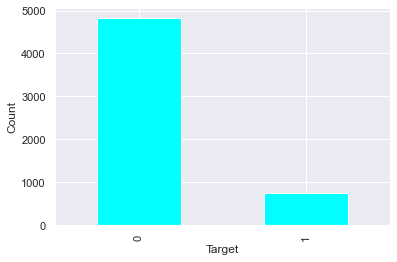

In [16]:
#Plotting Spam(1) vs Not Spam(0) value counts
data['Target'].value_counts().plot(kind='bar',color='cyan')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [18]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(data['Email'], data['Target'], test_size=0.2, random_state=0)
X_train.head(5)

1114    No no:)this is kallis home ground.amla home to...
3589    I am in escape theatre now. . Going to watch K...
3095    We walked from my moms. Right on stagwood pass...
1012       I dunno they close oredi not... ÌÏ v ma fan...
3320                               Yo im right by yo work
Name: Email, dtype: object

In [19]:
#Funtion to build and visualise a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title, accuracy_title):
    cm=confusion_matrix(y_test, y_pred)
    print(f'{accuracy_title} Accuracy Score:', '{:.2%}'.format(accuracy_score(y_valid, y_pred)))
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='magma')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [20]:
X_train.isnull().any()

False

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string if there are nans
#dataset['description'] = dataset['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix_train = tfidf.fit_transform(X_train)
tfidf_matrix_valid= tfidf.transform(X_valid)

tfidf_matrix_train.shape

(4457, 7351)

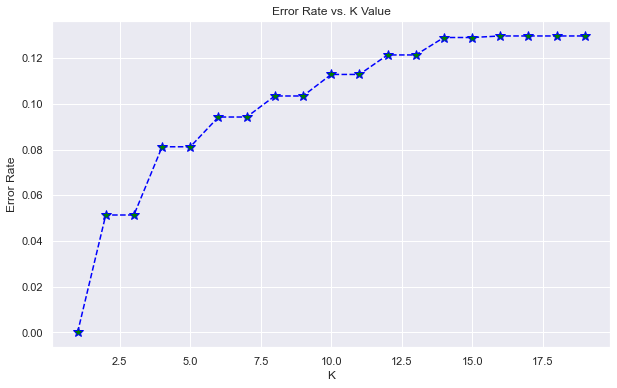

In [26]:
#Visualization to find the best K value
from sklearn.neighbors import KNeighborsClassifier
#To find the optimal k value: K=((Sqrt(N)/2)
#Visualisation for the Error Rate/K-value 
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p=1)
    knn.fit(tfidf_matrix_train, y_train)
    pred_i_knn = knn.predict(tfidf_matrix_train)
    error_rate.append(np.mean(pred_i_knn != y_train))
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', 
         marker='*',markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

KNN Accuracy Score: 94.35%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       949
           1       1.00      0.62      0.77       166

    accuracy                           0.94      1115
   macro avg       0.97      0.81      0.87      1115
weighted avg       0.95      0.94      0.94      1115



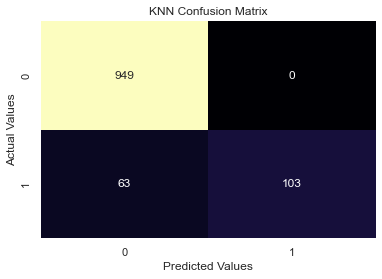

In [27]:
#Fitting the KNN model
knn_classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p=1)
knn_classifier.fit(tfidf_matrix_train, y_train)
y_pred_knn=knn_classifier.predict(tfidf_matrix_valid)
cm_knn=my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix', 'KNN')

Logistic Regression: Accuracy Score: 95.61%
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       949
           1       0.99      0.71      0.83       166

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115



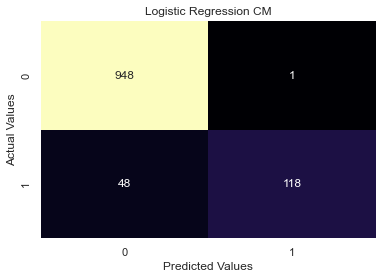

array([[948,   1],
       [ 48, 118]], dtype=int64)

In [28]:
#Training the model
from sklearn.linear_model import LogisticRegression
log_reg_classifier=LogisticRegression(solver='liblinear')
log_reg_classifier.fit(tfidf_matrix_train, y_train)
y_pred_log=log_reg_classifier.predict(tfidf_matrix_valid)
my_confusion_matrix(y_valid, y_pred_log, 'Logistic Regression CM', 'Logistic Regression:')

Random Forest Accuracy Score: 97.04%
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       949
           1       0.99      0.81      0.89       166

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



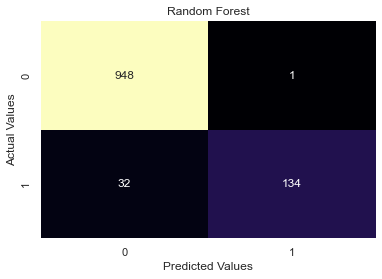

[[948   1]
 [ 32 134]]


In [29]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(tfidf_matrix_train, y_train)
y_pred_rfc=rfc.predict(tfidf_matrix_valid)
print(my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest', 'Random Forest'))

SVC Accuracy Score: 98.03%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       949
           1       0.99      0.87      0.93       166

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



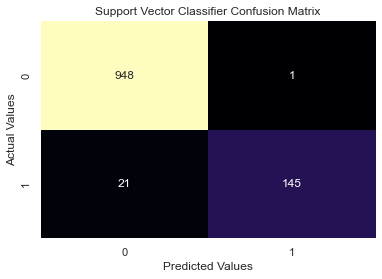

In [30]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=10)
svc.fit(tfidf_matrix_train, y_train)
y_pred_svc= svc.predict(tfidf_matrix_valid)
cm_svc=my_confusion_matrix(y_valid, y_pred_svc, 'Support Vector Classifier Confusion Matrix', 'SVC')

In [44]:
print (cm_svc)

[[948   1]
 [ 21 145]]
